<div class="markdown-google-sans">

## <strong>Redes Neuronales Clasicas</strong>
</div>

Definicion: Son modelos de aprendizaje profundo que consisten en una red de neuronas artificiales conectadas entre sí, donde cada neurona recibe una entrada, realiza un cálculo y produce una salida. Estas redes pueden ser utilizadas para problemas de clasificación, regresión, entre otros.

De que trata el codigo: Este código utiliza TensorFlow y Keras para construir y entrenar una red neuronal para clasificar imágenes del conjunto de datos MNIST, que consiste en imágenes de dígitos escritos a mano.

Paso 1:

Importamos las librerías necesarias: tensorflow, numpy, keras y varias clases y funciones de Keras para cargar y construir el modelo.

In [10]:
import tensorflow
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.layers import Dense
from keras import backend as K


Paso 2:

Definimos algunos hiperparámetros para el entrenamiento como:

1. El tamaño del lote que son 100
2. El número de clases que son 10
3. El número de épocas que son 5

In [11]:
batch_size=100
num_classes=10
epochs=5

Paso 3:

Las imágenes en el conjunto de datos están representadas como matrices 28x28. Luego cargamos el conjunto de datos MNIST utilizando la función mnist.load_data(), que devuelve tuplas con los datos de entrenamiento y prueba, así como sus respectivas etiquetas. 



In [12]:
filas,columnas= 28,28
(xt,yt),(xtest,ytest)= mnist.load_data()

Paso 4:

Para que nuestro modelo pueda procesar las imagenes tenemos que reconfigurar las dimensiones de entrada en matrices 28 x 28 x 1

In [13]:
xt=xt.reshape(xt.shape[0],filas,columnas,1)
xtest=xtest.reshape(xtest.shape[0],filas,columnas,1)

Paso 5:

Aqui lo que hacemos es la normalizacion de los datos de entrada, primero estamos convirtiendo los datos de tipo 'uint8' a tipo 'float32'. Luego estamos dividiendo cada pixel de la imagen entre 255 para que su valor se encuentre en rango de 0 a 1. Finalmente esta normalizacion se hace con el fin de mejorar la velocidad de entrenamiento y la precision del modelo.

In [14]:
xt=xt.astype('float32')
xtest=xtest.astype('float32')
xt=xt/255
xtest=xtest/255

Paso 6:

Luego convertimos las etiquetas a matrices one-hot utilizando la función tensorflow.keras.utils.to_categorical(), lo que permite que la salida de la red sea una distribución de probabilidad sobre las diferentes clases.

In [15]:
yt=tensorflow.keras.utils.to_categorical(yt,num_classes)
ytest=tensorflow.keras.utils.to_categorical(ytest,num_classes)

Paso 7:

Primero definimos el modelo de la red neuronal utilizando 'Sequential()'
La cual nos permite apilar capas una encima de otra en orden.

Luego tenemos la capa 'Flatten()' la cual aplana la imagen en una sola dimension.

Despues tenemos dos capas 'Dense()' con una funcion de activacion 'Relu'.

Finalmente una capa 'Dense()' tambien pero con una funcion de activacion 'Softmax' la cual produce una distribucion de probabilidad sobre las diferentes clases.

In [16]:
modelo=Sequential()

modelo.add(Flatten(input_shape=(28,28,1)))
modelo.add(Dense(68,activation='relu'))
modelo.add(Dense(20,activation='relu'))
modelo.add(Dense(num_classes,activation='softmax'))
modelo.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 68)                53380     
                                                                 
 dense_4 (Dense)             (None, 20)                1380      
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
Total params: 54,970
Trainable params: 54,970
Non-trainable params: 0
_________________________________________________________________


Explicacion del resultado 1 - Redes Neuronales Clasicas:

Como se comento arriba vemos la capa de aplanamiento(Flatten) la cual esta tomando como entrada un tensor de imagenes de 28 x 28 pixeles(784) y lo transforma en un vector de una dimension.

Primero vemos que nuestra primera capa tiene 68 neuronas, la segunda capa tiene 20 neuronas y la tercerca capa tiene 10 neuronas, tambien vemos a nuestro parametro "Output Shape' que nos muestra el tamanio de salida de cada capa. 

Luego vemos el parametro "Param #" el cual indica la cantidad de pesos y sesgos que tiene cada capa, despues lo que vendria a ser 'Total params' es la cantidad total de parametros en la red neuronal(54.970).

Despues vemos la seccion 'Trainable params' muestra la cantidad de parametros que se ajustaran durante el entrenamiento(54.970).

Finalmente vemos la seccion 'Non-trainable params' que muestra la cantidad de parametros que NO se ajustaran durante el entrenamiento que en este caso es 0.



Paso 8:

Aqui compilamos nuestro modelo usando 'Compile()', donde especificamos la funcion de perdida, el optimizador y la metrica que se utilizaran para evaluar el rendimiento del modelo durante el entrenamiento.


In [17]:
modelo.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer=tensorflow.keras.optimizers.Adam(),metrics
=['categorical_accuracy'])

Paso 9:

Primero entrenamos nuestro modelo con el metodo 'Fit()' donde especificamos los datos de entrenamiento y prueba, tambien el tamanio de lote, el numero de epocas.

Luego de eso evaluamos el rendimiento en los datos de prueba utilizando el metodo 'Evaluate()' que nos devuelve la perdida y la precision de nuestro modelo

Finalmente imprimimos la puntuacion obtenida.

In [18]:
modelo.fit(xt,yt,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))
puntuacion=modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)

Epoch 1/5
600/600 [==============================] - 6s 7ms/step - loss: 0.4005 - categorical_accuracy: 0.8862 - val_loss: 0.2009 - val_categorical_accuracy: 0.9418
Epoch 2/5
600/600 [==============================] - 4s 6ms/step - loss: 0.1758 - categorical_accuracy: 0.9490 - val_loss: 0.1516 - val_categorical_accuracy: 0.9540
Epoch 3/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1337 - categorical_accuracy: 0.9604 - val_loss: 0.1303 - val_categorical_accuracy: 0.9613
Epoch 4/5
600/600 [==============================] - 3s 5ms/step - loss: 0.1060 - categorical_accuracy: 0.9692 - val_loss: 0.1081 - val_categorical_accuracy: 0.9662
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1007 - categorical_accuracy: 0.9668
[0.10067076236009598, 0.9667999744415283]


Explicacion del resultado 2 - Redes Neuronales Clasicas:

En este resultado primero vemos el resutaldo del entrenamiento del modelo, luego en cada epoca vemos el valor de la funcion de perdida (Loss) y la precision (accuracy) del entrenamiento, en la validacion de la misma manera pero con el nombre de (val_loss y val_categorial_accuracy).

Por ejemplo, en la primera epoca, el valor de la funcion de perdida en el entrenamiento es de 0.4005 y la precision es 0.8862, mientras que el valor de la funcion de perdida en la validacion es de 0.2009 y la precision es de 0.9418. Esto significaria que el modelo esta obteniendo mejores resultados en el conjunto de validacion que en el conjunto de entrenamiento.

Al final se muestra la evaluacion del modelo en el conjunto de prueba. En este caso, el valor de la funcion de perdida es 0.10067 y la precision es 0.9667 lo que indica que el modelo tiene una buena capacidad de generalizacion y puede realizar predicciones precisas en nuevos datos.



<div class="markdown-google-sans">

## <strong>Redes Neuronales Convolucionales - Clasificacion Multiclase</strong>
</div>

Definicion: Son una variante de redes neuronales que se utilizan comúnmente en problemas de visión por computadora, como el reconocimiento de objetos en imágenes. Estas redes utilizan capas de convolución para extraer características de la imagen y luego clasificarlas en múltiples clases.

De que trata el codigo: Este es un código que utiliza la biblioteca Keras de TensorFlow para entrenar un modelo de red neuronal convolucional para la clasificación de imágenes en el conjunto de datos CIFAR-100.

Paso 1:

Importamos las librerías necesarias: Tensorflow, Numpy, Keras y Matplotlib para construir y entrenar nuestro modelo.

In [19]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar100
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import VGG16
import matplotlib.pylab as plt

Paso 2:

Aquí se definimos nuestras variables para el tamaño del lote(100), el número de clases(100) y el número de épocas(5) para entrenar el modelo

In [20]:
batch_size=100
num_classes=100
epochs=5

Paso 3:

Luego se carga el conjunto de datos CIFAR-100, que contiene 50,000 imágenes de entrenamiento y 10,000 imágenes de prueba.

In [21]:
(xt,yt),(xtest,ytest)= cifar100.load_data()
_,filas, columnas, canales = xt.shape


169001437/169001437 [==============================] - 6s 0us/step


Paso 4:

Aqui convertimos nuestras imagenes a números flotantes

In [22]:
xt=xt.astype('float32')
xtest=xtest.astype('float32')

Paso 5:

Aqui normalizamos dividiéndolas por 255. Además, las etiquetas se codifican en un formato "one-hot" utilizando la función to_categorical de Keras.

In [23]:
xt=xt/255
xtest=xtest/255
yt=keras.utils.to_categorical(yt,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

Paso 6:

Aqui definimos la arquitectura de neustra red neuronal convolucional

Para empezar estamos definiendo nuestra capa de entrada usando la funcion 'input()', nuestra entrada tiene una forma de (Filas, Columnas y Canales) la cual corresponde al dataset CIFAR-100

Luego definimos dos bloques de convolucion, cada bloque inicia con una capa 2D 'Conv2D' donde cada una utiliza una funcion de activacion ReLU 'activation = 'relu''.

Luego definimos dos bloques de convolucion, donde cada bloque inicia con una los mismo que los dos anteriores bloques.

Pero aqui vemos que el primer bloque usa 64 filtros mientras que el segundo utiliza 128 filtros.

Tambien mencionar que despues de cada capa de convolucion, se agrega una capa de agrupacion maxima 'MaxPooling2D' con un tamanio 2 x 2 la cual se usa para reducir la resolucion de la salida.

In [24]:
Entradas=Input(shape=(filas,columnas,canales))

x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(Entradas)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), name='block2_pool')(x)

Paso 7:

Aqui aplanamos la salida con 'Flatten()' para convertirla en un vector y se pasa a traves de dos capas totalmente conectadas 'Dense()', la primera capa tiene 512 neuronas y utiliza una funcion de activacion 'ReLU'. La segunda capa tiene 'num_classes' neuronas y utiliza una funcion de activacion 'Softmax'.

Y finalmente se agrega una capa de abandono 'DropOut()' con una tasa de abandono de 0.5 para evitar el sobreajuste.

In [ ]:
x = Flatten()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes,activation='softmax')(x)

Paso 8:

Aqui creamos el modelo de la red neuronal utilizando la clase 'Model' de Keras. Tambien especificamos la entrada que es 'Entradas' y a salida que es 'x'.

In [26]:
modelo = Model(inputs=Entradas, outputs=x)
#modelo.summary()

Paso 9:

Aqui realizamos la compilacion y el entrenamiento del modelo, el optimizador que estamos utilizando es Adam el cual tiene una tasa de aprendizaje de 0.001 y parametros beta1 y beta2 de 0.9.

Luego entrenamos el modelo mediante la funcion Fit y usando los datos de entrenamiento (xt e yt) y especificando el tamanio del lote(batch_size), las epocas, el nivel de detalles que se quiere ver en la salida (Verbose) y los datos de validacion (xtest e ytest)

Y ya finalmente estamos evaluando el modelo utilizando datos de prueba y guardamos el resutlado en la variable 'Puntuacion'.

In [27]:
Adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

modelo.compile(loss=keras.losses.categorical_crossentropy,optimizer=Adam,metrics=['categorical_accuracy'])

history=modelo.fit(xt,yt,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))

puntuacion=modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
500/500 [==============================] - 712s 1s/step - loss: 4.0830 - categorical_accuracy: 0.0734 - val_loss: 3.4668 - val_categorical_accuracy: 0.1816
Epoch 2/5
500/500 [==============================] - 650s 1s/step - loss: 3.3691 - categorical_accuracy: 0.1886 - val_loss: 3.0251 - val_categorical_accuracy: 0.2690
Epoch 3/5
500/500 [==============================] - 627s 1s/step - loss: 2.9898 - categorical_accuracy: 0.2605 - val_loss: 2.7101 - val_categorical_accuracy: 0.3237
Epoch 4/5
500/500 [==============================] - 651s 1s/step - loss: 2.7162 - categorical_accuracy: 0.3141 - val_loss: 2.5674 - val_categorical_accuracy: 0.3558
Epoch 5/5
313/313 [==============================] - 37s 116ms/step - loss: 2.4076 - categorical_accuracy: 0.3871
[2.407625675201416, 0.3871000111103058]


Explicacion de resultado 1 - Redes Neuronales Convolucionales - Clasificacion Multiclase:

Este resultado vemos la salida de la ejecucion de nuestro modelo. Primero vemos que nuestro modelo se entreno en 5 epocas con un batch_size de 32 y un conjunto de datos de entrenamiento (xt) y un conjunto de validacion (xtest).Luego vemos el progreso del modelo en terminos de perdida(loss) y precision(accuracy). Despues vemos que la perdida disminuye a medida que aumenta la precision del modelo en ambos conjuntos de datos.

Finalmente vemos la evaluacion del modelo en el conjunto de datos de prueba, con una perdida de 2.40 y una precision de 38.71. La conclusion es que el modelo al tener una precision de 38.71 no es muy bueno ya que no esta aprendiendo de manera afectiva las caracteristicas del conjunto de datos.

Paso 10: 

Aqui generamos una grafica que muestra la precision de nuestro modelo durante el entrenamiento y la evaluacion en cada epoca. 




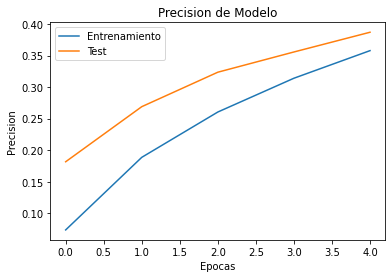

In [28]:
plt.figure(1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Precision de Modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')

Explicacion de resultado 2 - Redes Neuronales Convolucionales - Clasificacion Multiclase:

El eje X reprsenta las epocas del entrenamiento y el eje Y representa la precision del modelo. 

La linea azul muestra la precision durante el entrenamiento y la linea naranaja muestra la precision durante la evaluacion en el conjunto de datos de prueba. Si las lineas se mantienen cerca significa que el modelo esta aprendiendo bien.

Paso 11:

Aqui generamos una grafica que muestra la evolucion de las perdidas del modelo durante el entrenamiento y la validacion.


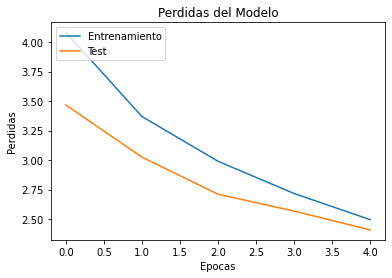

In [29]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


Explicacion de resultado 3 - Redes Neuronales Convolucionales - Clasificacion Multiclase:

En el eje Y representa el valor de perdida y en el eje X representa el numero de epocas.

Vemos como la perdida disminuye durante el entrenamiento y la validacion del modelo a medidad que aumenta el numero de epocas, lo que significa que el modelo esta mejorando su capacidad para predecir.



<div class="markdown-google-sans">

## <strong>Redes Neuronales Convolucionales - Regresion</strong>
</div>

Definicion: Son similares a las redes neuronales convolucionales utilizadas para clasificación, pero en lugar de clasificar las entradas en diferentes categorías, se utilizan para predecir un valor numérico continuo.

De que trata el codigo: Este código utiliza TensorFlow y Keras para construir y entrenar una red neuronal para clasificar los valores del conjunto de datos Boston_Housing el cual es un conjunto de datos de vivienda de Boston contiene 506 observaciones y 14 variables. 

Paso 1:

Importamos las librerías necesarias: Tensorflow, Numpy, Matplotlib, Keras y varias clases y funciones de Keras para cargar y construir el modelo.

In [30]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.applications import VGG16
import matplotlib.pylab as plt
from keras.datasets import boston_housing


Paso 2:

Aquí definimos nuestras variables para el tamaño del lote(10), y el número de épocas(50) para entrenar el modelo

In [31]:
batch_size=10
epochs=50

Paso 3:

Primero se carga el conjunto de datos de viviendas en Boston usando la función load_data() de Keras. 

Luego vemos como el conjunto de datos se divide en un conjunto de entrenamiento (xt, yt) y un conjunto de prueba (xtest, ytest).

Finalmente calculamos la media y la desviacion estandar con 'mean()' y 'std()'

In [32]:
(xt, yt), (xtest, ytest) = boston_housing.load_data()
mean = xt.mean(axis=0)
xt -= mean
std = xt.std(axis=0)
xt /= std
print(xt.shape[1])

xtest -= mean
xtest /= std

maximo=np.max(yt)
yt=yt/(maximo)
ytest=ytest/maximo

57026/57026 [==============================] - 0s 0us/step
13


Paso 4:

Primero definimos la arquitectura de nuestra red neuronal.

En la primera linea estamos definiendo la capa de entrada con 13 neuronas de entrada.

En la segunda linea se define una capa oculta de 64 neuronas y una funcion de activacion ReLU.

En la tercera linea tambien es una capa oculta con 64 neuronas y la misma funcion de activacion ReLU.

En la ultima linea define la capa de salida con una sola neurona con una funcion de activacion Lineal 

In [35]:
Entradas=Input(shape=(13,))
x=Dense(64,activation='relu')(Entradas)
x=Dense(64,activation='relu')(x)
x=Dense(1,activation='linear')(x)

Paso 5: 

Aqui construimos nuestro modelo y lo entrenamos.

Primero estamos creando utilizando la capa de entrada y la capada de salida.

Luego estamos definiendo nuestro optimizador el cual es Adam con una tasa de aprendizaje de 0.0001 y los parametros de beta_1 y beta_2 establecidos en 0.9.

Despues estamos compilando nuestro molesto con una funcion de perdida de error cuadrattco medio (MSE) y el optimizaror Adam.

Finalmente estamos entrenando nuestro modelo con un tamanio de lote de 10 y 50 epocas de entrenamiento.

In [36]:
modelo = Model(inputs=Entradas, outputs=x)
#modelo.summary()
Adam = Adam(lr=0.001,beta_1=0.9,beta_2=0.9)#SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

modelo.compile(loss=keras.losses.mse,optimizer=Adam,metrics=['mse'])

history=modelo.fit(xt,yt,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(xtest,ytest))

puntuacion=modelo.evaluate(xtest,ytest,verbose=1)

print(puntuacion)


Epoch 1/50
41/41 [==============================] - 1s 7ms/step - loss: 0.1515 - mse: 0.1515 - val_loss: 0.0302 - val_mse: 0.0302
Epoch 2/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 3/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 4/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 5/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 6/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 7/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 8/50
41/41 [==============================] - 0s 3ms/step - loss: 0.0033 - mse: 0.00

Explicacion de resultado 1 - Redes Neuronales Convolucionales - Regresion

Primero vemos el resultado de nuestro entrenamiento donde hemos usado el algoritmo de descenso de gradiente para minimizar la funcion de perdida, usando el loss y el mse.

Luego vemos la tabla donde tanto los valores de perdida y mse de cada epoca tanto para los datos de entrenamiento, como tambien para los datos de validacion.

Finalmente observamos que la perdida y el mse disminuyen a medida que aumentan las epocas, lo que nos indica que el modelo esta mejorando.

Paso 6:

Aqui estamos creando nuestra grafica usando matplotlib, tambien vemos como se usa la informacion almacenada para graficar las perdidas del entrenamiento y validacion.

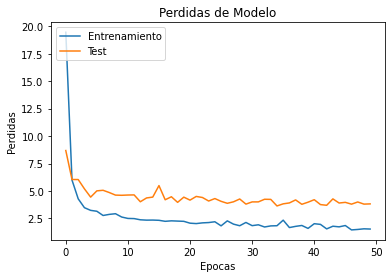

In [37]:
plt.figure(1)
plt.plot(np.sqrt(history.history['loss'])*maximo)
plt.plot(np.sqrt(history.history['val_loss'])*maximo)
plt.title('Perdidas de Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Explicacion resultado 2 - Redes Neuronales Convolucionales - Regresion:

En el eje x, se representan las épocas del entrenamiento y en el eje y, se muestran las pérdidas.

La curva azul muestra la evolución de las pérdidas del conjunto de entrenamiento a lo largo de las épocas, mientras que la curva naranja muestra la evolución de las pérdidas del conjunto de validación. 

Finalmente vemos como ambas curvas disminuyen lo cual significa que estamos minimizando las perdidas y eso es un buen indicador de nuestro modelo.



<div class="markdown-google-sans">

## <strong>Redes Neuronales Convolucionales - Clasificacion Binaria</strong>
</div>

Definicion: Son una variante de las redes neuronales convolucionales utilizadas para clasificar entradas en dos clases diferentes. Por ejemplo, en la detección de enfermedades, donde el modelo debe decidir si el paciente está enfermo o sano.

De que trata el codigo: Este es un código que utiliza la biblioteca Keras para construir una red neuronal para clasificar si un pasajero del Titanic sobrevivió o no.

Paso 1:

Damos acceso a nuestro drive para poder cargar la  base de datos

In [38]:
from google.colab import drive
drive.mount("/content/drive")
 

Mounted at /content/drive


Paso 2:

Importamos las librerías necesarias: tensorflow, numpy, pandas, keras y varias clases y funciones de Keras para cargar y construir el modelo.

In [39]:
from keras.layers import Input, Flatten, Dense, Dropout, Reshape, PReLU,LeakyReLU,BatchNormalization,Activation
from keras.models import Model
import numpy as np
import keras
import keras.layers as layers
import keras.backend as K
import math
from keras.models import load_model,Model
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

Paso 3: 

Importamos los datos del entrenamiento y de la validacion desde nuestro drive.

In [40]:
traindata = pd.read_csv('/content/drive/MyDrive/base_de_datos_titanic/train.csv')

testdata = pd.read_csv('/content/drive/MyDrive/base_de_datos_titanic/test.csv')

Paso 4:

Aquí definimos una función para procesar los datos, la función procesa los datos de la siguiente manera:

Primero se seleccionan solo algunas columnas de los datos: 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch' y 'Fare'.

Luego se rellenan los valores faltantes con la media de la columna, la columna 'Sex' se codifica como 0 para mujeres y 1 para hombres, la columna 'Pclass' se resta en 1.

Despues la función devuelve los datos procesados.

Finalmente la función se utiliza para procesar los datos de entrenamiento y prueba, y los valores de la columna 'Survived' se guardan en la variable yt. También se convierte yt a un vector one-hot utilizando la función to_categorical de Keras.

In [41]:
def process_data(datos):
  xt = datos[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
  xt = xt.fillna(xt.mean())

  xt.loc[:,'Sex'] = xt['Sex'].replace(['female','male'],[0,1]).values
  xt.loc[:,'Pclass'] = xt.loc[:,'Pclass'] - 1

  return xt

xt = process_data(traindata)

xtest = process_data(testdata)

yt = traindata["Survived"]
ytonehot = tf.keras.utils.to_categorical(yt, num_classes=2)
print(ytonehot)

Paso 5:

Aqui convertimos los datos de entrenamiento y los valores objetivo en matrices Numpy

In [43]:
arraytrainx=np.array(xt)
arraytrainy=np.array(yt)

Paso 6:

Aqui definimos la entrada de la red neuronal utilizanco la funcion 'input'.

Primero vemos las capas de la red neuronal, la primera capa de tipo 'Dense' con 200 neuronas. La siguiente capa es una de normalizacion de lote 'BatchNormalization', la cual ayuda a que nuestra red converja mas rapido y a reducir el sobreajusto.

Luego tenemos una capa de normalizacion de lotes, que tiene una funcion de activacion 'LeakyReLU' la cual es una version mejorada de la funcion 'ReLU' la cual previene la muerte de las neuronas y ayuda a que la red converja mas rapido

Despues tenemos otra capa 'Dense' con 50 neuronas, despues una capa de normalizacion y una capa 'LeakyReLu'

Finalmente la ultima capa que es una capa 'Dense' con una funcion de activacion 'Sigmoid' la cual se usa para que la salida sea un valor entre 0 y 1

In [44]:
Entradas = Input(shape=(6,))

x=Dense(200)(Entradas)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.05)(x)
#x=Dropout(0.15)(x)

x=Dense(50)(x)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.05)(x)
#x=Dropout(0.1)(x)

x=Dense(1)(x)
x = Activation('sigmoid')(x)

modelo = Model(inputs=Entradas, outputs=x)



Paso 7: 

Aqui creamos un objeto de 'ModelCheckpoint' que es una herramienta que nos permite guardar el modelo despues de cada epoca si se cumple cierta condicion.

Primero definimos al optimizador de la funcion de perdida la cual es 'Adam'

Luego compilamos el modelo con 'Adam' como optimizador,  despues la funcion de perdida con 'binary_crossentropy' y  finalmente la metrica de precision que es 'accuracy' durante 400 epocas.

In [45]:
Guardado = keras.callbacks.ModelCheckpoint('titanic.h5', monitor='val_accuracy', verbose=0, 
save_best_only=True,save_weights_only=False, mode='auto', period=1)
Adam = keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.9)

modelo.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['accuracy'])
history=modelo.fit(arraytrainx,arraytrainy ,epochs=400, 
batch_size=200,validation_split=0.2,callbacks=[Guardado],verbose=0)

Paso 8:

Aqui graficamos nuestra primera grafica la cual se basa en la precision del entrenamiento y la precision en la validacion.

Donde: 

La precisión se muestra en el eje y, mientras que el número de épocas se muestra en el eje x.

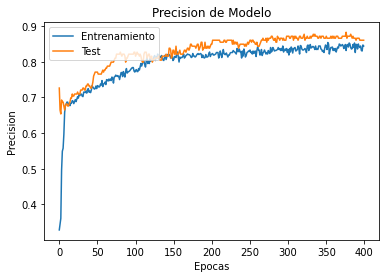

In [47]:
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision de Modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')

Explicacion del resultado 1 - Redes Neuronales Convolucionales - Clasificacion Binaria:

La línea azul muestra la precisión del modelo en el conjunto de entrenamiento a lo largo de cada época.

La línea naranja muestra la precisión del modelo en el conjunto de validación a lo largo de cada época.  

Paso 9:

Aqui graficamos nuestra segunda grafica la cual se basa en la perdida del entrenamiento y la perdida en la validacion.

Donde:

El eje y representa el valor de la función de pérdida, mientras que el eje x representa el número de épocas.

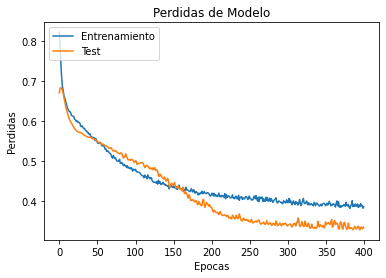

In [48]:
plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas de Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Explicacion del resultado 2 - Redes Neuronales Convolucionales - Clasificacion Binaria:

La línea azul muestra la perdida del modelo en el conjunto de entrenamiento a lo largo de cada época.

La línea naranja muestra la perdida del modelo en el conjunto de validación a lo largo de cada época.  

<div class="markdown-google-sans">

## <strong>Redes Neuronales Recurrentes Aplicadas a Series Temporales</strong>
</div>

Definicion: Son una variante de las redes neuronales que se utilizan para analizar datos secuenciales o de series de tiempo, como señales de audio o datos de sensores. Estas redes utilizan conexiones recurrentes para almacenar información en la red a lo largo del tiempo y pueden ser utilizadas para predecir futuros valores de la serie temporal.

De que trata el codigo: Este código utiliza una red neuronal recurrente (RNN) LSTM (Long Short-Term Memory) para predecir series de tiempo unidimensionales. El objetivo del modelo es predecir valores futuros de una serie de tiempo de pasajeros aéreos internacionales en función de los valores anteriores.

Paso 1:

Damos acceso a nuestro drive para poder cargar la  base de datos


In [6]:
from google.colab import drive
drive.mount("/content/drive")

%cd /content/drive/MyDrive/base_datos_pasajeros/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/base_datos_pasajeros


Paso 2:

Importamos las librerías necesarias: tensorflow, numpy, pandas, math, sklearn, keras y varias clases y funciones de Keras para cargar y construir el modelo.

In [7]:
import tensorflow as tf
import numpy as np
import keras
import math
from pandas import read_csv
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Input,Conv3D,BatchNormalization,ConvLSTM2D,LSTM,GRU
from keras import backend as K
from keras.callbacks import TensorBoard
from keras.optimizers import SGD,Adam
from keras.preprocessing import image
import matplotlib.pylab as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Paso 3:

Creamos una matriz de datos de entrada y una matriz de salida para la red neuronal. La función toma una serie de tiempo y la transforma en una matriz de entrada X y una matriz de salida Y, donde X contiene una secuencia de valores de tiempo y Y contiene el valor de tiempo siguiente en la secuencia.

In [8]:
# Conversion Array-Matriz

def create_base_datos(datos, mirar_atras=1):
  datosX, datosY = [], []
  for i in range(len(datos)-mirar_atras-1):
    a = datos[i:(i+mirar_atras), 0]
    datosX.append(a)
    datosY.append(datos[i + mirar_atras, 0])
  return np.array(datosX), np.array(datosY)

Paso 4:

Primero importamos la serie de tiempo de los datos de pasajeros aéreos internacionales en formato CSV utilizando la biblioteca pandas, que luego se convierte a una matriz de valores numpy. 

Luego vemos como los datos se normalizan utilizando la clase MinMaxScaler de la biblioteca scikit-learn. 

Despues se dividen los datos normalizados en conjuntos de entrenamiento y finalmente la prueba en una proporción de 2:1.

In [9]:
#Cargar Datos
dataframe = read_csv('international_airline_passengers.csv', usecols=[1], engine='python', skipfooter=3)
datos = dataframe.values
datos = datos.astype('float32')

#Normalizacion de Datos
escalado = MinMaxScaler(feature_range=(0, 1))
datos = escalado.fit_transform(datos)

#Division en Train/Test
tsize = int(len(datos) * 0.67)
testsize = len(datos) - tsize
entrenamiento, test = datos[0:tsize,:], datos[tsize:len(datos),:]

Paso 5:

Ajustamos las matrices de datos de entrenamiento y prueba utilizando la función 'create_base_datos' y cambiamos los tamaños de las matrices tX y testX para que sean compatibles con la entrada del modelo LSTM.

In [10]:
# Cambio de tamaños de train y test
mirar_atras= 1
tX, tY = create_base_datos(entrenamiento, mirar_atras)
testX, testY = create_base_datos(test, mirar_atras)
tX = np.reshape(tX, (tX.shape[0], 1, tX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

Paso 6:

Primero creamos la arquitectura de nuestro modelo RNN-LSTM 

Luego vemos que la entrada del modelo es una secuencia unidimensional de valores de tiempo (input) que se alimenta en una capa LSTM o GRU (x) con 10 unidades. 

Despues utilizamos una capa densa 'Dense' con una sola unidad para producir la salida del modelo. 

Finalmente compilamos nuestro modelo especificando la función de pérdida loss(mean_squared_error) y el optimizador(adam) y ajustamos nuestro modelo a los datos de entrenamiento (tX y tY) durante 100 épocas.

In [11]:
# Creacion de Red con LSTM
input=Input(shape=(1,mirar_atras))
#x=LSTM(10)(input)
x=GRU(10)(input)
x=Dense(1)(x)
model=Model(inputs=input,outputs=x)
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(tX, tY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
94/94 - 5s - loss: 0.0134 - 5s/epoch - 51ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0078 - 190ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0062 - 190ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0048 - 199ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0037 - 203ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0030 - 205ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0025 - 195ms/epoch - 2ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0022 - 200ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0022 - 184ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0021 - 214ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0021 - 185ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0022 - 191ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0021 - 185ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0021 - 188ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0020 - 200ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0021 - 191ms/epoc

Explicacion de resultado 1 - Redes Neuronales Recurrentes Aplicadas a Series Temporales:

Vemos que el progreso de un modelo de aprendizaje automático en el tiempo a medida que entrena durante 100 épocas.

La tabla muestra la pérdida en cada época medida en segundos y en milisegundos por paso. La pérdida disminuye a lo largo del tiempo, lo que indica que el modelo está mejorando en su capacidad para hacer predicciones precisas.

Paso 7: 

Aqui graficamos la evolucion de las perdidas durante el entrenamiento de nuestro modelo.

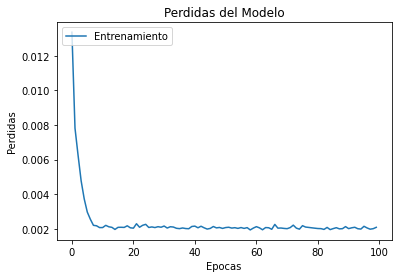

In [12]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.title('Perdidas del Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento'], loc='upper left')

Explicacion del resultado 2 - Redes Neuronales Recurrentes Aplicadas a Series Temporales:

Vemos el titulo del grafico que es 'Perdidas del Modelo'.

El eje X como 'Epocas'

El eje Y como 'Perdidas'

Vemos que la perdida baja hasta un punto donde se estabiliza, lo que es un buen indicador de nuestro modelo.

Paso 8:

Esta parte del código realiza las predicciones del modelo para los datos de entrenamiento y de prueba y luego invierte el escalado de las predicciones para calcular el error. 

También calcula la puntuación del modelo utilizando la raíz del error cuadrático medio (RMSE) y muestra la puntuación de entrenamiento y de prueba en la pantalla.

Luego el código desplaza las predicciones del modelo hacia atrás en el tiempo y las almacena en dos matrices llamadas plot_prediccion_entrenamiento y despues plot_prediccion_test. 

Finalmente vemos como estas matrices se utilizan más adelante para trazar las predicciones del modelo junto con los datos originales.


In [13]:
# Realizacion de predicciones
prediciones_entrenamiento = model.predict(tX)
prediciones_test = model.predict(testX)

# Inversion de las predicciones para calcular su error
prediciones_entrenamiento = escalado.inverse_transform(prediciones_entrenamiento)
tY = escalado.inverse_transform([tY])
prediciones_test = escalado.inverse_transform(prediciones_test)
testY = escalado.inverse_transform([testY])

# Calculo de la raiz del error cuadratico medio o RMSE
Puntuacion_Train = math.sqrt(mean_squared_error(tY[0,:], prediciones_entrenamiento[:,0]))
Puntuacion_Test = math.sqrt(mean_squared_error(testY[0], prediciones_test[:,0]))
print('Puntuacion Train: %.2f RMSE y Puntuacion Test: %.2f RMSE' % (Puntuacion_Train,Puntuacion_Test))

# Desplazamiento de predicciones de entrenamiento
plot_prediccion_entrenamiento = np.empty_like(datos)
plot_prediccion_entrenamiento[:, :] = np.nan
plot_prediccion_entrenamiento[mirar_atras:len(prediciones_entrenamiento)+mirar_atras, :] = prediciones_entrenamiento

# Desplazamiento de predicciones de test
plot_prediccion_test = np.empty_like(datos)
plot_prediccion_test[:, :] = np.nan
plot_prediccion_test[len(prediciones_entrenamiento)+(mirar_atras*2)+1:len(datos)-1, :] = prediciones_test


2/2 [==============================] - 0s 6ms/step
Puntuacion Train: 22.68 RMSE y Puntuacion Test: 48.73 RMSE


Explicacion del resultado 3 - Redes Neuronales Recurrentes Aplicadas a Series Temporales:

El resultado obtenido indica que el modelo entrenado tiene una puntuación de 22.68 en el conjunto de datos de entrenamiento (Train) y una puntuación de 48.73 en el conjunto de datos de prueba (Test).

Paso 9: 

Aqui se mostrara las predicciones del modelo junto con los datos reales. Se grafican tres curvas en una misma figura.





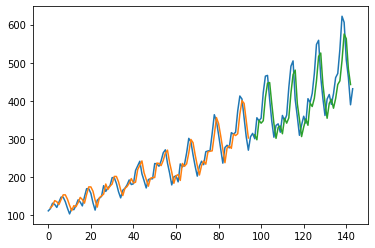

In [14]:
# Mostrar predicciones y datos
plt.figure(2)
plt.plot(escalado.inverse_transform(datos))
plt.plot(plot_prediccion_entrenamiento)
plt.plot(plot_prediccion_test)
plt.show()

Explicacion del resultado 4 - Redes Neuronales Recurrentes Aplicadas a Series Temporales:

La curva en azul corresponde a los datos reales (sin escalar), la curva en naranja corresponde a las predicciones del modelo sobre los datos de entrenamiento y la curva en verde corresponde a las predicciones del modelo sobre los datos de test.

Lo que podemos entender aqui es que nuestro modelo esta teniendo problemas para hacer precisiones precisas.

<div class="markdown-google-sans">

## <strong>Redes Neuronales Recurrentes Aplicadas a Textos</strong>
</div>

Definicion: Son una variante de las redes neuronales que se utilizan para procesar texto y analizar el lenguaje natural. Estas redes utilizan conexiones recurrentes para analizar la secuencia de palabras en una oración y pueden ser utilizadas para tareas como la generación de texto, la traducción automática y la clasificación de texto.

De que trata el codigo: Este código en Python utiliza la biblioteca Keras para crear y entrenar un modelo de aprendizaje profundo para la clasificación binaria de comentarios.

Paso 1:

Damos acceso a nuestro drive para poder cargar la  base de datos



In [16]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Paso 2:

Importamos las librerías necesarias: sys, tensorflow, json, codecs, numpy, pandas, keras y varias clases y funciones de Keras para cargar y construir el modelo.

In [17]:
import sys
import json
import codecs
import numpy as np
import pandas as pd
import keras
import keras.backend as K
import tensorflow as tf

from keras.callbacks import ModelCheckpoint
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Input,Bidirectional,GlobalMaxPool1D,Flatten,BatchNormalization,LeakyReLU
from keras.layers.convolutional import Conv1D,Conv2D
from tensorflow.python.keras.layers.convolutional import MaxPooling1D
from tensorflow.python.keras.layers.embeddings import Embedding
from keras.utils import pad_sequences
from keras.preprocessing import sequence,text
from keras import Model
from keras.models import load_model

Paso 3: 

Primero importamos los datos desde nuestro drive y luego lo convierte en una lista

Despues inicializa dos listas, una para las etiquetas binarias de salida y otra para el texto de entrada.

In [18]:
#LECTURA DE FICHEROS DE DATOS
df = pd.read_csv('/content/drive/MyDrive/train.csv')
fichero=df.values.tolist()
salida_binaria=[]
texto_entrada=[]

Paso 4:

Aqui vemos como se binariza las etiquetas de salida en base a varias columnas del archivo CSV, y luego se agregan los comentarios de entrada a una lista.

In [19]:
#BINARIZACION DE ETIQUETAS
for i in range(0,len(fichero)):
  if(fichero[i][2]==1 or fichero[i][3]==1 or fichero[i][4]==1 or fichero[i][5]==1 or fichero[i][6]==1 or fichero[i][7]==1):
    salida_binaria.append(1)
  if(fichero[i][2]==0 and fichero[i][3]==0 and fichero[i][4]==0 and fichero[i][5]==0 and fichero[i][6]==0 and fichero[i][7]==0):
    salida_binaria.append(0)
  texto_entrada.append(fichero[i][1])

Paso 5:

Primero se realiza la tokenización y vectorización del texto de entrada, utilizando una función Tokenizer de Keras para convertir el texto en una secuencia de números enteros y la función pad_sequences para asegurarse de que todas las secuencias tengan la misma longitud, tambien vemos como se convierte la lista de etiquetas de salida en una matriz NumPy para que pueda ser utilizada por el modelo de Keras.

Luego vemos como se encarga de calcular el peso de la clase 0 y la clase 1 para la función de pérdida que se usará en el modelo.

Despues se seleccionan los puntos (muestras) del conjunto de datos que tienen una salida (label) igual a 1, y se calcula el porcentaje de puntos que pertenecen a esta clase (en la variable TP).

Finalmente se define una función llamada create_weighted_binary_crossentropy que toma como argumentos zero_weight y one_weight, que son los pesos asignados a la clase 0 y la clase 1, respectivamente.



In [20]:
#VECTORIZACION DE ENTRADAS
caracteristicas_maximas=500
longitud_maxima=250
tokenizer = text.Tokenizer(num_words=caracteristicas_maximas)
tokenizer.fit_on_texts(list(texto_entrada))
entrada_entrenamiento_vectorizada = tokenizer.texts_to_sequences(texto_entrada)
entrada_entrenamiento = pad_sequences(entrada_entrenamiento_vectorizada, maxlen=longitud_maxima)

salida_entrenamiento=np.array(salida_binaria)

ptos=salida_entrenamiento[salida_entrenamiento==1]

TP=len(ptos)/len(salida_entrenamiento)

def create_weighted_binary_crossentropy(zero_weight, one_weight):
  def weighted_binary_crossentropy(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    b_ce = K.binary_crossentropy(y_true, y_pred)
    weight_vector = y_true * one_weight + (1. - y_true) * zero_weight
    weighted_b_ce = weight_vector * b_ce
    return K.mean(weighted_b_ce)
  return weighted_binary_crossentropy

Paso 6: 

Aqui creamos el modelo de nuestra red neuronal recurrente, vemos el tamanio del espacio del embedding que es 150, tambien vemos la entrada de la red para nuestro modelo.

Primero vemos la capa de embedding que mapea los tokens de entrada en vectores densos de 150 dimensiones. Las caracteriticas maximas son el numero total de caracteristicas UNICAS que aparecen en los datos de entrenamiento. 

Luego se crea una capa Bidireccional LSTM CON 150 unidades, despues vemos una capa Densa con una funcion de activacion 'Sigmoid' la cual produce una probabilidad entre 0 y 1. 

Finalmente compilamos nuestro modelo e imprimimos un resumen del modelo, incluyendo el numero de parametro.

In [21]:
#CREACION DE MODELO
tamano_embedding = 150

entrada_red = Input(shape=(longitud_maxima, ))
x = Embedding(caracteristicas_maximas, tamano_embedding)(entrada_red)
x = Bidirectional(LSTM(150, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation="sigmoid")(x)

modelo = Model(inputs=entrada_red, outputs=x)
modelo.compile(loss=create_weighted_binary_crossentropy(TP, 1 - TP),optimizer=keras.optimizers.Adam(0.0001),metrics=['binary_accuracy'])
modelo.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250)]             0         
                                                                 
 tf.cast_1 (TFOpLambda)      (None, 250)               0         
                                                                 
 tf.compat.v1.nn.embedding_l  (None, 250, 150)         0         
 ookup_1 (TFOpLambda)                                            
                                                                 
 bidirectional_1 (Bidirectio  (None, 250, 300)         361200    
 nal)                                                            
                                                                 
 global_max_pooling1d_1 (Glo  (None, 300)              0         
 balMaxPooling1D)                                                
                                                           

Explicacion de resultado 1 - Redes Neuronales Recurrentes Aplicadas a Textos:

Primero vemos capas de nuestra red neuronal, la informacion del tipo de capa, la forma de la salida y la cantidad de parametros. Ya que tenemos 4 capas, la primera capa es de entrada 'input', la segunda capa es de embedding, la tercera capa es de bidireccional LSTM y la cuarta capa de salida.

En resumen aqui encontramos la arquitectura de nuestra red e informacion util para entender nuestro modelo y asi poder evaluar su complejidad y su capacidad de generalizacion.

Paso 7:

Primero entrenamos y evaluamos a nuestro modelo, vemos que es un lote de 64 y 6 epocas esto lo hacemos asi ya que la data que se tiene es muy grande lo cual hace que se demore mucho tiempo.

Luego entrenamos nuestro modelo con nuestra funcion fit 

Despues de entrenar nuestro modelo, cargamos los pesos del modelo que tuvieron el mejor desempenio durante el entrenamiento.

Para finalmente realizar predicciones.



In [22]:
#ENTRENAMIENTO
batch_size = 64
epochs = 6
checkpoint = ModelCheckpoint('comentarios.h5', monitor='val_loss', verbose=1, save_best_only=True,save_weights_only=True,mode='auto')
modelo.fit(entrada_entrenamiento, salida_entrenamiento, batch_size=batch_size, epochs=epochs,callbacks=[checkpoint],validation_split=0.2,shuffle=True,verbose=1)
modelo.load_weights('comentarios.h5')
predicciones=modelo.predict(entrada_entrenamiento[:1000],verbose=1)

Epoch 1/6
625/625 [==============================] - ETA: 0s - loss: 0.1238 - binary_accuracy: 0.5207
Epoch 1: val_loss improved from inf to 0.11621, saving model to comentarios.h5
625/625 [==============================] - 28s 35ms/step - loss: 0.1238 - binary_accuracy: 0.5207 - val_loss: 0.1162 - val_binary_accuracy: 0.6217
Epoch 2/6
625/625 [==============================] - ETA: 0s - loss: 0.1130 - binary_accuracy: 0.6033
Epoch 2: val_loss improved from 0.11621 to 0.10544, saving model to comentarios.h5
625/625 [==============================] - 21s 34ms/step - loss: 0.1130 - binary_accuracy: 0.6033 - val_loss: 0.1054 - val_binary_accuracy: 0.5843
Epoch 3/6
625/625 [==============================] - ETA: 0s - loss: 0.1047 - binary_accuracy: 0.6608
Epoch 3: val_loss improved from 0.10544 to 0.10010, saving model to comentarios.h5
625/625 [==============================] - 22s 36ms/step - loss: 0.1047 - binary_accuracy: 0.6608 - val_loss: 0.1001 - val_binary_accuracy: 0.6668
Epoch 4/

Explicacion del resultado 2 - Redes Neuronales Recurrentes Aplicadas a Textos: 

Primero vemos los resultados de nuestro entrenamiento, el modelo se entreno durante 6 epocas, cada uno con un tamaño de lote de 64 ejemplos. 

En cada epoca, el modelo actualiza los pesos y sesgos de las conexiones neuronales para reducir la función de pérdida (loss) en los datos de entrenamiento.

Luego del entrenamiento, el modelo se carga con los pesos del modelo con la menor pérdida en los datos de validación guardados en "comentarios.h5". 

Despues el modelo luego realiza predicciones en los primeros 1000 ejemplos de los datos de entrenamiento y finalmente devuelve las predicciones en "predicciones".

Paso 8:

Aqui mostraremos ejemplos de los comentarios que puede generar nuestro modelo a los cuales no considera como negativos.

Primero filtramos las predicciones que son menores a 0.1. 

Luego se seleccionan los primeros comentarios de la entrada de texto que corresponden a esas predicciones y se imprimen en la consola para que el usuario los pueda ver.


In [23]:
#EJEMPLOS DE COMENTARIOS

#COMENTARIO NO NEGATIVO
negativo=predicciones[predicciones<0.1]
print(negativo[0])
texto_interes=np.array(texto_entrada[:1000])
texto_interes=np.expand_dims(texto_interes,axis=1)
negativo=texto_interes[predicciones<0.1]
print(negativo[0])

0.072569266
"
More
I can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.

There appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "


Explicacion del resultado 3 - Redes Neuronales Recurrentes Aplicadas a Textos:

Aqui vemos el funcionamiento de nuestro modelo con comentarios positivos

Como por ejemplo:

I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  

Que en espaniol es: 

Me preguntaba si la sección de estadísticas debería estar más adelante, o una subsección de ""tipos de accidentes""

Paso 9:

Aqui mostraremos ejemplos de los comentarios que puede generar nuestro modelo a los cuales considera como negativos.

Primero filtraremos las predicciones que tienen una probabilidad mayor a 0.9 de ser negativos luego se imprimen para revisión. 

Despues si encuentra al menos una predicción negativa, se imprime el primer comentario correspondiente a esa predicción. 

Y si no se encuentra ninguna predicción negativa, se imprime un mensaje indicando que no se encontraron comentarios negativos.

In [24]:
#COMENTARIO NEGATIVO
positivo=predicciones[predicciones>0.9]

if len(positivo) > 0:
  print(positivo[0])
  texto_interes=np.array(texto_entrada[:1000])
  texto_interes=np.expand_dims(texto_interes,axis=1)
  positivo=texto_interes[predicciones>0.9]
  print(positivo[0])
else:
  print("No se encontraron comentarios negativos.")

0.9352304
you are a stupid fuck 

and your mother's cunt stinks


Explicacion del resultado 4 - Redes Neuronales Recurrentes Aplicadas a Textos:

Aqui veriamos el funcionamiento de nuestro modelo con respecto a comentarios negativos.

Por ejemplo:

you are a stupid fuck and your mother's cunt stinks

Que en espaniol seria:

eres un es__do de mie__a y el co_o de tu madre ape_ta


In [ ]:
print("Muchas gracias eso fue todo por mi parte :), CONDORI GUTIERREZ Rodrigo Bernardo")